In [2]:
import pandas as pd
import matplotlib
import json
import requests
import hvplot.pandas
from pathlib import Path
from MCForecastTools import MCSimulation

In [3]:
valuation_data_df = pd.read_csv(Path("./home.csv"))
valuation_data_df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
0,6181,0,New York,City,NY,NY,New York-Newark-Jersey City,Queens County,252701.0,254520.0,...,711720.0,716349.0,721313.0,727207.0,732201.0,735891.0,738692.0,742776.0,747650.0,753782.0
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,237081.0,237303.0,...,876405.0,898997.0,912715.0,922531.0,925407.0,929815.0,935460.0,940493.0,949548.0,965684.0
2,39051,2,Houston,City,TX,TX,Houston-The Woodlands-Sugar Land,Harris County,108945.0,108955.0,...,222419.0,227346.0,232692.0,236787.0,240316.0,242730.0,245503.0,248436.0,251793.0,256143.0
3,17426,3,Chicago,City,IL,IL,Chicago-Naperville-Elgin,Cook County,168395.0,168797.0,...,292262.0,294721.0,297793.0,299858.0,301899.0,304491.0,306932.0,309246.0,310564.0,312489.0
4,6915,4,San Antonio,City,TX,TX,San Antonio-New Braunfels,Bexar County,116080.0,116262.0,...,244883.0,250291.0,256005.0,259832.0,263958.0,267630.0,272340.0,277101.0,281583.0,287310.0


In [4]:
nyc_df = valuation_data_df[valuation_data_df['RegionName']=="New York"]
la_df = valuation_data_df[valuation_data_df['RegionName']=="Los Angeles"]

In [5]:
la_df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-06-30,2021-07-31,2021-08-31,2021-09-30,2021-10-31,2021-11-30,2021-12-31,2022-01-31,2022-02-28,2022-03-31
1,12447,1,Los Angeles,City,CA,CA,Los Angeles-Long Beach-Anaheim,Los Angeles County,237081.0,237303.0,...,876405.0,898997.0,912715.0,922531.0,925407.0,929815.0,935460.0,940493.0,949548.0,965684.0


In [19]:
nyc = pd.melt(nyc_df, id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'])

nyc['variable']= pd.to_datetime(nyc['variable'], infer_datetime_format = True)

nyc.set_index('variable', inplace=True)

nyc = nyc.loc['2012-01-31':]
nyc = nyc.drop(columns= ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'])
nyc=nyc.rename(columns={'value':'close'})
nyc.index.names = ['Date']

In [20]:
la = pd.melt(la_df, id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'])

la['variable']= pd.to_datetime(la['variable'], infer_datetime_format = True)

la.set_index('variable', inplace=True)

la = la.loc['2012-01-31':]
la = la.drop(columns= ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName',
       'State', 'Metro', 'CountyName'])
la.index.names = ['Date']
la.rename(columns={'variable':'Date','value':'close'}, inplace=True)
la

,close
Date,
2012-01-31,404944.0
2012-02-29,404864.0
2012-03-31,404603.0
2012-04-30,405428.0
2012-05-31,406655.0
...,...
2021-11-30,929815.0
2021-12-31,935460.0
2022-01-31,940493.0


In [37]:
combo= pd.concat([nyc,la],keys=["nyc","la"], axis="columns", sort =False).dropna()
returns= combo.pct_change().dropna()


In [38]:
returns

,nyc,la
,close,close
Date,,
2012-02-29,-0.000596,-0.000198
2012-03-31,-0.002914,-0.000645
2012-04-30,0.000540,0.002039
2012-05-31,-0.000250,0.003026
2012-06-30,0.002965,0.005880
...,...,...
2021-11-30,0.005040,0.004763
2021-12-31,0.003806,0.006071


In [29]:
combo.hvplot(legend=True).opts(yformatter="%.0f")

DataError: Supplied data does not contain specified dimensions, the following dimensions were not found: ['nyc', 'la']

PandasInterface expects tabular data, for more information on supported datatypes see http://holoviews.org/user_guide/Tabular_Datasets.html

In [11]:
!pip install fredapi
import fredapi as fa

import pandas as pd



fred = fa.Fred(settings['f381743e5771e6778ba8544e3e42f97b'])

mortgages = fred.get_series('MORTGAGE30US')

mortgages.tail()


NameError: name 'settings' is not defined

In [39]:
thirty_year_simulation = MCSimulation(
    portfolio_data=returns,
    weights=[100.0,0],
    num_simulation=50,
    num_trading_days=252*1,
)

In [40]:
thirty_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


/Users/babinshrestha/opt/anaconda3/envs/dev/lib/python3.7/site-packages/numpy/lib/function_base.py:3961: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,-5.633618e+01,7.979503e+01,-1.632050e+02,-1.094116e+02,-7.244870e+00,-2.295716e+02,2.456852e+02,-1.637895e+02,-1.569688e+01,-1.119858e+02,...,-1.574026e+02,1.596640e+02,-3.023276e+01,2.966340e+01,5.517293e+01,-1.132280e+02,-1.175784e+02,-1.387120e+02,-2.478185e+02,-1.454054e+02
2,-7.538502e+03,3.829137e+03,8.236192e+03,5.070114e+03,-1.152947e+03,5.108091e+04,4.264378e+04,3.845880e+04,2.432335e+03,-2.799188e+04,...,-7.420586e+03,3.310234e+04,-4.883885e+03,6.233794e+03,6.381813e+03,4.021208e+04,1.165450e+04,2.477539e+04,3.405857e+04,-8.229718e+03
3,1.677274e+06,-1.207443e+05,-1.484670e+05,1.798548e+06,1.446275e+05,7.972623e+05,-4.489219e+06,-5.875801e+06,-3.156991e+05,2.603213e+06,...,-1.070058e+06,-4.137144e+06,1.281618e+06,-1.320445e+06,-1.434974e+06,-1.091234e+07,1.142536e+06,-2.409854e+06,-4.393192e+05,1.476775e+06
4,3.347556e+08,-5.147004e+06,6.023930e+05,-2.264073e+08,5.324701e+06,5.156867e+07,1.383072e+09,9.166282e+08,3.092448e+07,-6.596202e+07,...,8.727554e+06,2.484656e+07,-4.273476e+08,-2.145686e+07,-2.657546e+08,1.940779e+09,-2.435703e+08,-3.069719e+08,-1.251200e+06,-7.883197e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,inf,-inf,-inf,inf,-inf,inf,inf,inf,-inf,-inf,...,-inf,inf,-inf,inf,-inf,-inf,-inf,-inf,-inf,-inf
249,-inf,-inf,-inf,-inf,-inf,inf,-inf,inf,inf,-inf,...,inf,inf,inf,-inf,-inf,-inf,inf,-inf,inf,-inf
250,inf,inf,-inf,inf,-inf,inf,-inf,inf,-inf,inf,...,-inf,-inf,inf,-inf,-inf,inf,-inf,inf,inf,inf
251,inf,inf,-inf,inf,-inf,inf,inf,-inf,-inf,inf,...,inf,-inf,inf,-inf,inf,inf,inf,-inf,-inf,inf


In [41]:
thirty_year_simulation.plot_simulation() 

/Users/babinshrestha/opt/anaconda3/envs/dev/lib/python3.7/site-packages/matplotlib/axes/_base.py:2916: RuntimeWarning: overflow encountered in double_scalars
  delta = (x1t - x0t) * margin


<AxesSubplot:title={'center':'50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 252 Trading Days.'}>

IndexError: index 0 is out of bounds for axis 0 with size 0

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 50 Simulations'}, ylabel='Frequency'>

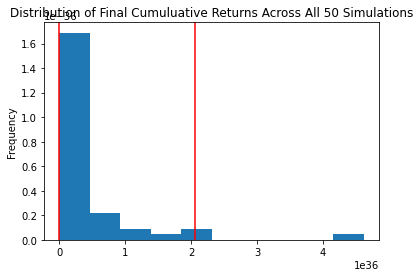

In [34]:
thirty_year_simulation.plot_distribution() 